## 1: Import PyTorch & required Libs

In [ ]:
# import PyTorch and required Libs
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## 2: Import Dataset from TorchVision

In [ ]:
# Import train_dataset
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

# Import test dataset
test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
# behaves differently from MNIST / Fashion MNIST
# it is a Numpy array!
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
# we are working with color images now
train_dataset.data.shape

(50000, 32, 32, 3)

In [ ]:
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [ ]:
# number of classes
K = len(set(train_dataset.targets))
print("number of classes:", K)

number of classes: 10


## 3: Data Loader->Train Loader & Test Loader (for generating batches)

In [ ]:
# Data Loader
# Useful because it automatically generates batches in the training loop
# and takes care of shuffling
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
# the data transformer mapped the data to (0, 1)
# and also moved the color channel before height/weight
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.9098, 0.9216, 0.8588,  ..., 0.5961, 0.6039, 0.6078],
          [0.9098, 0.9216, 0.8588,  ..., 0.5882, 0.5922, 0.5843],
          [0.9255, 0.9333, 0.8667,  ..., 0.5725, 0.5804, 0.5725],
          ...,
          [0.8471, 0.8510, 0.8510,  ..., 0.7569, 0.7804, 0.8980],
          [0.8431, 0.8510, 0.8588,  ..., 0.6235, 0.7686, 0.8549],
          [0.8863, 0.9020, 0.9137,  ..., 0.6471, 0.8588, 0.8784]],

         [[0.8980, 0.9020, 0.8549,  ..., 0.6275, 0.6314, 0.6392],
          [0.8941, 0.8980, 0.8510,  ..., 0.6196, 0.6235, 0.6196],
          [0.9098, 0.9098, 0.8588,  ..., 0.6078, 0.6157, 0.6078],
          ...,
          [0.8706, 0.8784, 0.8784,  ..., 0.7647, 0.7686, 0.8863],
          [0.8667, 0.8745, 0.8784,  ..., 0.5569, 0.7176, 0.8431],
          [0.8941, 0.9059, 0.9176,  ..., 0.6039, 0.8588, 0.8784]],

         [[0.8235, 0.8196, 0.7255,  ..., 0.4314, 0.4392, 0.4392],
          [0.8314, 0.8275, 0.7373,  ..., 0.4275, 0.4275, 0.4235],
          [0.8510, 0.8471, 0.7569,  ..., 0

## 4: Create the model

In [ ]:
# Define the model
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()

    # define the conv layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

    # define the linear layers
    self.fc1 = nn.Linear(128 * 3 * 3, 1024)
    self.fc2 = nn.Linear(1024, K)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 128 * 3 * 3)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x

In [ ]:
# Instantiate the model
model = CNN(K)

### Move the model to CUDA/GPU

In [ ]:
# Check CUDA & move model to CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

### Loss & Optimizer

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

## 5: Train the Model

In [ ]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss
    train_loss = np.mean(train_loss)

    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)

      outputs = model(inputs)
      loss = criterion(outputs, targets)

      test_loss.append(loss.item())
    
    # Get test loss
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \ Test Loss: {test_loss:.4f}, Duration: {dt}')

  return train_losses, test_losses

In [ ]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train Loss: 1.7397, \ Test Loss: 1.5561, Duration: 0:00:13.907153
Epoch 2/15, Train Loss: 1.4474, \ Test Loss: 1.3639, Duration: 0:00:13.679928
Epoch 3/15, Train Loss: 1.3160, \ Test Loss: 1.2850, Duration: 0:00:13.785373
Epoch 4/15, Train Loss: 1.2208, \ Test Loss: 1.2084, Duration: 0:00:13.769912
Epoch 5/15, Train Loss: 1.1456, \ Test Loss: 1.1451, Duration: 0:00:13.794525
Epoch 6/15, Train Loss: 1.0860, \ Test Loss: 1.1164, Duration: 0:00:13.794119
Epoch 7/15, Train Loss: 1.0385, \ Test Loss: 1.0870, Duration: 0:00:13.852927
Epoch 8/15, Train Loss: 0.9976, \ Test Loss: 1.0652, Duration: 0:00:13.768903
Epoch 9/15, Train Loss: 0.9544, \ Test Loss: 1.0490, Duration: 0:00:13.753907
Epoch 10/15, Train Loss: 0.9218, \ Test Loss: 1.0574, Duration: 0:00:13.874675
Epoch 11/15, Train Loss: 0.8914, \ Test Loss: 1.0389, Duration: 0:00:13.732575
Epoch 12/15, Train Loss: 0.8573, \ Test Loss: 1.0126, Duration: 0:00:13.785931
Epoch 13/15, Train Loss: 0.8419, \ Test Loss: 1.0123, Duratio

## 6: Evaluate the Model

### Plot Train & Test Loss Per Iteration

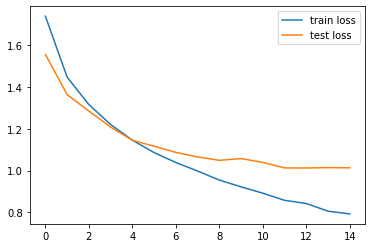

In [ ]:
# Plot the train and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

### Model Accuracy: Train accuracy & Test accuracy

In [ ]:
# Accuracy 
n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max return both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0
n_total = 0
for inputs, targets in test_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 0.7356, Test acc: 0.6507


### Confusion Matrix

In [ ]:
# Confusion matrix func
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(conf_mat)

  plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mat.max() / 2.
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
      plt.text(j, i, format(conf_mat[i, j], fmt),
               horizontalalignment="center",
               color="white" if conf_mat[i, j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

Confusion matrix, without normalization
[[693  33  72  15  23   8  19  12  86  39]
 [ 18 809  10  10   3   2   9   6  30 103]
 [ 61  11 568  76  87  59  90  26   8  14]
 [ 22  15 115 449  58 181  90  41   9  20]
 [ 20   5 111  61 579  40 102  67  13   2]
 [ 11   7  95 206  62 524  38  43   6   8]
 [  8   5  49  49  48  19 800  10   6   6]
 [ 19   8  51  52  85  68  16 672   6  23]
 [ 77  69  34  23   9   6  17   5 729  31]
 [ 39 150  14  17   4  10  16  20  25 705]]


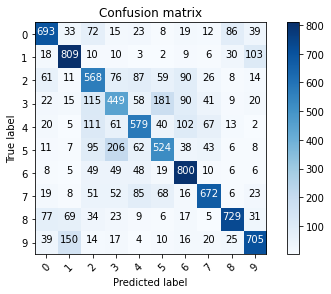

In [ ]:
# get all predictions in an array and plot confusion matrix
X_test = test_dataset.data
y_test = np.array(test_dataset.targets)
pred_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)

  # update pred_test
  pred_test = np.concatenate((pred_test, predictions.cpu().numpy()))

conf_mat = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(conf_mat, list(range(K)))

## 7: Prediction: True-classified & Misclassified examples

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: ship, Predicted: ship')

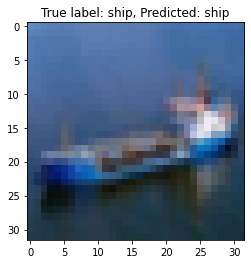

In [ ]:
# Show some true_classified example
pred_test = pred_test.astype(np.uint8)
true_classified_idx = np.where(pred_test == y_test)[0]
i = np.random.choice(true_classified_idx)
plt.imshow(X_test[i].reshape(32, 32, 3))
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[pred_test[i]]))

Text(0.5, 1.0, 'True label: truck, Predicted: automobile')

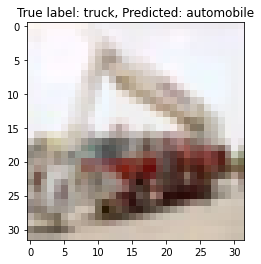

In [ ]:
# Show some misclassified example
pred_test = pred_test.astype(np.uint8)
misclassified_idx = np.where(pred_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(32, 32, 3))
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[pred_test[i]]))